# Project description

**Gold recovery**

An industrial company specializing in developing solutions for the efficient operation of enterprises is currently constructing a machine learning model. The purpose of this model is to accurately predict the gold recovery rate from gold-bearing ore by utilizing data on various mining and purification parameters. This predictive model will enable the optimization of production processes to avoid launching the plant under unprofitable conditions.

# Table of contents

---

1. [Introduction to study](#introduction-to-study)
    * [Technological process](#technological-process)
    * [Process description](#process-description)
    * [Stage parameters](#stage-parameters)
    * [Efficiency calculation](#efficiency-calculation)
    * [Quality metric](#quality-metric)
    * [Data description](#data-description)
2. [Data](#data)
    * [Enrichment efficiency](#enrichment-efficiency)
    * [Features analysis](#features-analysis)
    * [Data preprocessing](#data-preprocessing)
    * [Conclusion](#data-conclusion)
3. [Data analysis](#ata-analysis)
    * [Changes in metal concentrations](#changes-in-metal-concentrations)
    * [Particle size distribution of raw materials](#particle-size-distribution-of-raw-materials)
    * [Study of total concentration](#study-of-total-concentration)
    * [Conclusion](#data-analysis-conclusion)
4. [Model](#model)
    * [sMAPE calculation](#smape-calculation)
    * [Datasets preparation](#datasets-preparation)
    * [Hyperparameter tuning](#hyperparameter-tuning)
    * [Models training](#models-training)
    * [sMAPE results](#smape-results)
    * [Conclusion](#model-conclusion)
5. [Best model test](#best-model-test)
6. [Conclusion](#conclusion)
---

## Introduction to study <a class="anchor" id="introduction-to-study"></a>

It is required to prepare a prototype for a machine learning model for **"Цифры"** (eng. **Figures**), a company specializing in developing solutions for the efficient operation of industrial enterprises.

The model is intended to predict the gold recovery rate from gold-bearing ore, utilizing data on various mining and purification parameters. Its development aims to optimize production processes, ensuring that the plant is not launched under unprofitable conditions.

The project involves the following tasks:

- Data preparation;
- Conducting an exploratory data analysis;
- Building and training the machine learning model.

### Technological process <a class="anchor" id="technological-process"></a>

How is gold extracted from ore? Study the stages of the process carefully. After primary processing, the mined ore becomes a crushed mixture that is sent for flotation (enrichment) and two-stage purification.

[![](https://mermaid.ink/img/pako:eNp9kLtuwzAMRX9F4NQCCbR7KNBEsacuTTcpAyExthA9DJlGUQT596oyOnQpJz4O7wV5B5sdQQfXkD_thIXFhzJJ1HjVcsjBiVxIXsR-_yIOT33IyMg-p-fWGbRUa5wFow8-jYu8bLuHNj1q-Z7XcRI2J0uJCzL9EsdGKN37srCwgTBVAbEwzZvZsHGqFSd9piri_gFPrei17H3C8NcSdhCpRPSuXnr_4Q3wRJEMdDV1WG4GTHpUDlfO569koeOy0g7W2VUJ5XEsGKG7Ylhql5znXN6217UPPr4Bo1JnxA?type=png)](https://mermaid.live/edit#pako:eNp9kLtuwzAMRX9F4NQCCbR7KNBEsacuTTcpAyExthA9DJlGUQT596oyOnQpJz4O7wV5B5sdQQfXkD_thIXFhzJJ1HjVcsjBiVxIXsR-_yIOT33IyMg-p-fWGbRUa5wFow8-jYu8bLuHNj1q-Z7XcRI2J0uJCzL9EsdGKN37srCwgTBVAbEwzZvZsHGqFSd9piri_gFPrei17H3C8NcSdhCpRPSuXnr_4Q3wRJEMdDV1WG4GTHpUDlfO569koeOy0g7W2VUJ5XEsGKG7Ylhql5znXN6217UPPr4Bo1JnxA)

Let's describe each stage:

1. **Flotation.** A mixture of gold-bearing ore is fed into the flotation plant. After enrichment, a rough concentrate and "tailings" are obtained, which are the remnants of the product with a low concentration of valuable metals. The stability of this process is affected by the unstable and suboptimal physical and chemical state of the flotation pulp (a mixture of solid particles and liquid).

2. **Purification.** The rough concentrate undergoes two stages of purification. The output is a final concentrate and new tailings.

### Process description <a class="anchor" id="process-description"></a>
- `Rougher feed`: raw material
- `Rougher additions` (or `reagent additions`): flotation reagents: *Xanthate, Sulphate, Depressant*
    - `Xanthate`: xanthogenate (promoter, or flotation activator);
    - `Sulphate`: sulfate (sodium sulfide at this plant);
    - `Depressant`: depressant (sodium silicate).
- `Rougher process`: flotation
- `Rougher tails`: tailings
- `Float banks`: flotation plant
- `Cleaner process`: cleaning
- `Rougher Au`: rough gold concentrate
- `Final Au`: final gold concentrate

### Stage parameters <a class="anchor" id="stage-parameters"></a>
- `air amount`: volume of air
- `fluid levels`: liquid level
- `feed size`: size of raw material grains
- `feed rate`: feed rate

### Efficiency calculation <a class="anchor" id="efficiency-calculation"></a>

You need to model the process of gold recovery from gold-bearing ore.
The enrichment efficiency is calculated by the formula:

$$ \text{Recovery}= \frac{C * (F - T)}{F * (C - T)} * 100\% $$

where:
- C - the share of gold in the concentrate after flotation/cleaning;
- F - the share of gold in the ore/concentrate before flotation/cleaning;
- T - the share of gold in the tailings after flotation/cleaning.

To predict the coefficient, it is necessary to find the share of gold in the concentrates and tailings. Moreover, not only the final product but also the rough concentrate is important.

### Quality metric <a class="anchor" id="quality-metric"></a>

To solve the task, we introduce a new quality metric called sMAPE (*Symmetric Mean Absolute Percentage Error*). It is similar to MAE but expressed not in absolute terms, but in relative ones. Why is it called *symmetric*? It equally takes into account the scale of the target feature and the predictions.

The `sMAPE` metric is calculated as follows:

$$ \text{sMAPE} = \frac{1}{N}\sum_{i=1}^{N}{\frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|) / 2}} $$

where:

- $ y_i $ is the actual value of the target feature for the $ i $ object in the dataset;
- $ \hat{y}_i $ is the predicted value of the target feature for the $ i $ object in the dataset;
- $ N $ is the number of objects in the dataset;
- $ \sum_{i=1}^{N} $ is the sum over all objects in the dataset ($ i $ varies from 1 to $ N $).

We need to predict two values:

1. The recovery rate of the rougher concentrate `rougher.output.recovery`;
2. The recovery rate of the final concentrate `final.output.recovery`.

The final metric is a weighted average of the two metrics:

$$ \text{Finall sMAPE}=25\% * \text{sMAPE(rougher)} + 75\% * \text{sMAPE(final)} $$

### Data description <a class="anchor" id="data-description"></a>

Data is located in three files:

- `gold_recovery_train_new.csv` - training set;
- `gold_recovery_test_new.csv` - test set;
- `gold_recovery_full_new.csv` - original data.

The data is indexed by the date and time of information retrieval (the `date` feature). Parameters that are close in time are often similar.

Some parameters are not available because they are measured and/or calculated significantly later. Because of this, some features may be missing in the test set that are present in the training set. Also, there are no target features in the test set.

The original dataset contains both the training and test sets with all features. You have access to the raw data: it was simply exported from the repository. Before building a model, please check the data for correctness according to our instructions.

## Data <a class="anchor" id="data"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Searching for CSV files in multiple locations
csv_files = []
for file in os.listdir('.'):
    if file.endswith('.csv'):
        csv_files.append(file)

if 'gold_recovery_train_new.csv' in csv_files and 'gold_recovery_test_new.csv' in csv_files and 'gold_recovery_full_new.csv' in csv_files:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')
else:
    try:
        df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
        df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
        df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    except FileNotFoundError:
        try:
            df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
            df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
            df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
        except FileNotFoundError:
            print('File not found')

# Ignoring all warnings and displaying all columns in the DF
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Set names for each dataframe
title_train = 'Training dataset'
title_test = 'Test dataset'
title_full = 'Original dataset'


In [3]:
# Iterates through each dataframe using a 'for loop'
# The enumerate function is used to get the index of each dataframe
dataframes = {
    'Training dataset': df_train,
    'Test dataset': df_test,
    'Original dataset': df_full
}

for var_name, df in dataframes.items():
    print(f"Shape of {var_name}: {df.shape}")
    print(f"-" * 26)
    print(f"Missing values: \n")
    print(df.isnull().sum().sum())
    print(f"-" * 26)
    print(f"Duplicates: \n")
    print(df.duplicated().sum())
    print(f"-" * 26)
    print(f"Dataframe info: \n")
    print(df_train.info())
    print(f"-" * 26)
    display(df.head())
    print(f"\n")

Shape of Training dataset: (14149, 87)
--------------------------
Missing values: 

4100
--------------------------
Duplicates: 

0
--------------------------
Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.



Shape of Test dataset: (5290, 53)
--------------------------
Missing values: 

90
--------------------------
Duplicates: 

0
--------------------------
Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50



Shape of Original dataset: (19439, 87)
--------------------------
Missing values: 

4481
--------------------------
Duplicates: 

0
--------------------------
Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 n

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

### Enrichment efficiency <a class="anchor" id="enrichment-efficiency"></a>

We will use the formula provided in the brief to calculate the efficiency using the above formula on the training dataset:

$$ \text{Recovery}= \frac{C * (F - T)}{F * (C - T)} * 100\% $$

To calculate the `MAE`, we will create a Series with data from the `rougher.output.recovery` column.

In [4]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

# The formula
recovery_au = (C * (F - T) / (F * (C - T))) * 100

# Create the Series
mae = df_train['rougher.output.recovery']

print(f"Gold (Au) recovery efficiency calculation: \n{recovery_au.head(10)}")

Gold (Au) recovery efficiency calculation: 
0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
dtype: float64


In [5]:
np.format_float_positional(mean_absolute_error(mae, recovery_au), trim='-')

'0.00000000000000973512347450521'

### Features analysis <a class="anchor" id="features-analysis"></a>

For the task, it is necessary to analyze how many features are missing in the test dataset `df_test` compared to the training dataset `df_train`. It is also necessary to understand what these features are.

In [6]:
print(f"Amount of missing features: {df_train.columns.difference(df_test.columns).value_counts().sum()}")
print(f"\nFeatures list: \n{df_train.columns.difference(df_test.columns)}")

Amount of missing features: 34

Features list: 
Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 

### Data preprocessing <a class="anchor" id="data-preprocessing"></a>

There are missing values in data, checking the amount:

In [7]:
df = [df_train, df_test, df_full]

def missing_values(title, df):
    print(f"{title}. Missing values: {round(df.isna().mean().sum() * 100, 2)}%")
    return

missing_values(title_train, df_train)
missing_values(title_test, df_test)
missing_values(title_full, df_full)

Training dataset. Missing values: 28.98%
Test dataset. Missing values: 1.7%
Original dataset. Missing values: 23.05%


Replace date with index, replacing NaN with 0 filling missing values with .ffill():

In [8]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)
df_full = df_full.drop('date', axis=1)

df_train = df_train.ffill()
df_test = df_test.ffill()
df_full = df_full.ffill()

missing_values(title_train, df_train)
missing_values(title_test, df_test)
missing_values(title_full, df_full)

Training dataset. Missing values: 0.0%
Test dataset. Missing values: 0.0%
Original dataset. Missing values: 0.0%


In [9]:
(df_train==0).sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
14144    4
14145    4
14146    4
14147    4
14148    4
Length: 14149, dtype: int64

### Conclusion <a class="anchor" id="data-conclusion"></a>

1. After the initial **data review**, the following was revealed:

    - `df_train`: there are 4100 missing values and 0 duplicates. The shape of the df is (14149, 87) and the data type is **float64**.
    - `df_test`: there are 90 missing values and 0 duplicates. The shape of the df is (5290, 53) and the data type is **float64**.
    - `df_full`: there are 4481 missing values and 0 duplicates. The shape of the array is (19439, 87) and the data type is **float64**.
    - In all dataframes, the `date` column has an **object** format.


2. **Enrichment efficiency.** The calculation of gold recovery efficiency was checked and the results are correct. The value of Mean Absolute Error (MAE) was calculated and it is extremely low: **0.00000000000000973512347450521**, which indicates a high level of accuracy.


3. **Features analysis.** In the `df_test` test set, 34 features are missing, which are related to the following stages:

| Feature | Stage | Parameter type |
|--|--|--|
| final.output.concentrate_ag | Final characteristics | Product parameters |
| final.output.concentrate_au | Final characteristics | Product parameters |
| final.output.concentrate_pb | Final characteristics | Product parameters |
| final.output.concentrate_sol | Final characteristics | Product parameters |
| final.output.recovery | Final characteristics | Product parameters |
| final.output.tail_ag | Final characteristics | Product parameters |
| final.output.tail_au | Final characteristics | Product parameters |
| final.output.tail_pb | Final characteristics | Product parameters |
| final.output.tail_sol | Final characteristics | Product parameters |
| primary_cleaner.output.concentrate_ag | Primary cleaning | Product parameters |
| primary_cleaner.output.concentrate_au | Primary cleaning | Product parameters |
| primary_cleaner.output.concentrate_pb | Primary cleaning | Product parameters |
| primary_cleaner.output.concentrate_sol | Primary cleaning | Product parameters |
| primary_cleaner.output.tail_ag | Primary cleaning | Product parameters |
| primary_cleaner.output.tail_au | Primary cleaning | Product parameters |
| primary_cleaner.output.tail_pb | Primary cleaning | Product parameters |
| primary_cleaner.output.tail_sol | Primary cleaning | Product parameters |
| rougher.calculation.au_pb_ratio | Flotation | Calculation parameters |
| rougher.calculation.floatbank10_sulfate_to_au_feed | Flotation | Calculation parameters |
| rougher.calculation.floatbank11_sulfate_to_au_feed | Flotation | Calculation parameters |
| rougher.calculation.sulfate_to_au_concentrate | Flotation | Calculation parameters |
| rougher.output.concentrate_ag | Flotation | Product parameters |
| rougher.output.concentrate_au | Flotation | Product parameters |
| rougher.output.concentrate_pb | Flotation | Product parameters |
| rougher.output.concentrate_sol | Flotation | Product parameters |
| rougher.output.recovery | Flotation | Product parameters |
| rougher.output.tail_ag | Flotation | Product parameters |
| rougher.output.tail_au | Flotation | Product parameters |
| rougher.output.tail_pb | Flotation | Product parameters |
| rougher.output.tail_sol | Flotation | Product parameters |
| secondary_cleaner.output.tail_ag | Secondary cleaning | Product parameters |
| secondary_cleaner.output.tail_au | Secondary cleaning | Product parameters |
| secondary_cleaner.output.tail_pb | Secondary cleaning | Product parameters |
| secondary_cleaner.output.tail_sol | Secondary cleaning | Product parameters |


4. **Data preprocessing:**

    - Columns with date information were removed since they were not necessary for further analysis and data processing.
    - Missing values in the `df_train` and `df_test` dataframes were filled using the forward-fill method `ffill()`. This method fills the missing values with the previous non-missing value, and since neighboring time parameters are often similar, this approach was considered reasonable.

## Data analysis <a class="anchor" id="data-analysis"></a>

### Changes in metal concentrations <a class="anchor" id="changes-in-metal-concentrations"></a>

Let's see how the concentrations of metals (Au, Ag, Pb) change at different stages of purification. To do this, three separate data frames for each metal at different stages of purification will be created, calculated the median values of the changes in concentration, visualized the changes and added numbers for clarity.

In [10]:
# Extract concentration data for gold (Au), silver (Ag) and lead (Pb) at various stages of the process
Au = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au',
              'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
Ag = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
              'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
Pb = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

In [11]:
# Calculate median concentration for each stage of the process for each metal
au_rough_input = Au['rougher.input.feed_au'].median()
au_rough_output = Au['rougher.output.concentrate_au'].median()
au_clean = Au['primary_cleaner.output.concentrate_au'].median()
au_final = Au['final.output.concentrate_au'].median()

ag_rough_input = Ag['rougher.input.feed_ag'].median()
ag_rough_output = Ag['rougher.output.concentrate_ag'].median()
ag_clean = Ag['primary_cleaner.output.concentrate_ag'].median()
ag_final = Ag['final.output.concentrate_ag'].median()

pb_rough_input = Pb['rougher.input.feed_pb'].median()
pb_rough_output = Pb['rougher.output.concentrate_pb'].median()
pb_clean = Pb['primary_cleaner.output.concentrate_pb'].median()
pb_final = Pb['final.output.concentrate_pb'].median()

# Create a dataframe to store the median concentration for each metal and each stage of the process
metal_concentrate = pd.DataFrame(
    {'Feed': [au_rough_input, ag_rough_input, pb_rough_input],
     'Flotation': [au_rough_output, ag_rough_output, pb_rough_output],
     'Primary cleaning': [au_clean, ag_clean, pb_clean],
     'Final concentrate': [au_final, ag_final, pb_final]},
    index=['Gold', 'Silver', 'Lead']
)

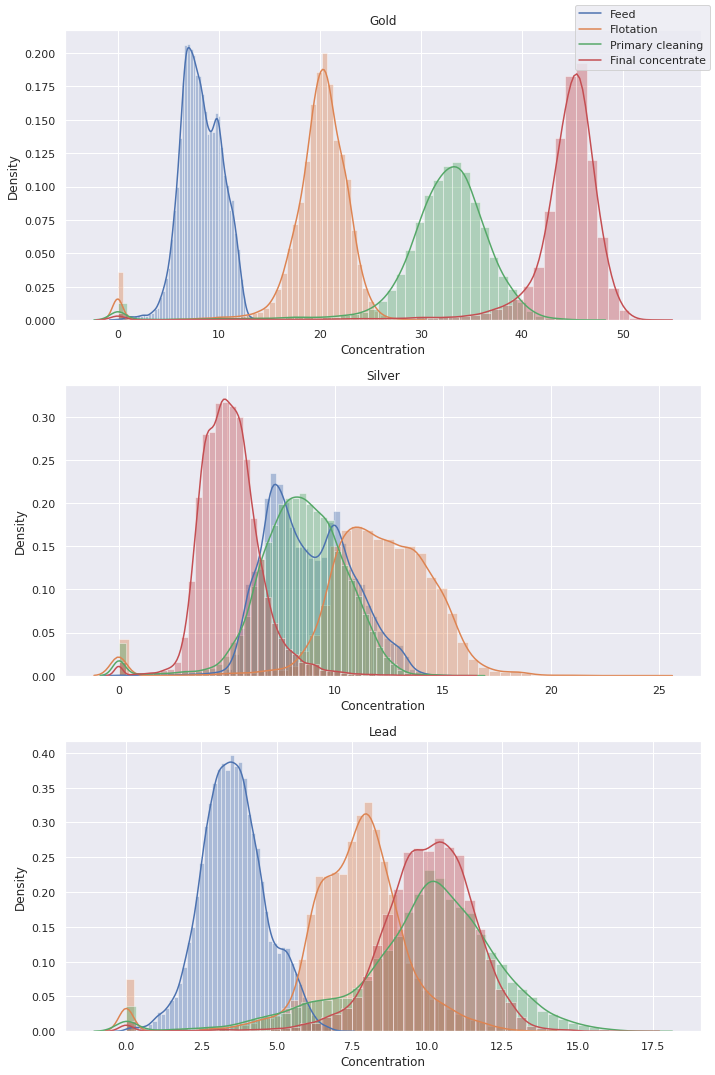


Results: 
            Feed  Flotation  Primary cleaning  Final concentrate
Gold    8.125839  20.280214         32.841295          45.011244
Silver  8.593574  12.098115          8.507298           5.066039
Lead    3.528235   7.742580         10.142270          10.102264


In [12]:
# Set up the graph
sns.set(rc={'figure.figsize': (10, 15)}, color_codes=True)
pal = sns.color_palette('Set2', 50)

# Create a subplot with three graphs
fig, axs = plt.subplots(3, 1)

# Plot the distribution of concentration for gold (Au) at each stage of the process
for column in list(Au):
    sns.distplot(Au[column], ax=axs[0])
axs[0].set(title='Gold', xlabel='Concentration')

# Plot the distribution of concentration for silver (Ag) at each stage of the process
for column in list(Ag):
    sns.distplot(Ag[column], ax=axs[1])
axs[1].set(title='Silver', xlabel='Concentration')

# Plot the distribution of concentration for lead (Pb) at each stage of the process
for column in list(Pb):
    sns.distplot(Pb[column], ax=axs[2])
axs[2].set(title='Lead', xlabel='Concentration')

# Add a legend to the graph
fig.legend(['Feed', 'Flotation', 'Primary cleaning', 'Final concentrate'])
plt.tight_layout()
plt.show()

# Printing results
print(f"\nResults: \n{metal_concentrate}")

### Particle size distribution of raw materials <a class="anchor" id="particle-size-distribution-of-raw-materials"></a>

It is necessary to compare the particle size distributions of raw materials in the training and test sets. If the distributions differ significantly from each other, the model evaluation will be incorrect.

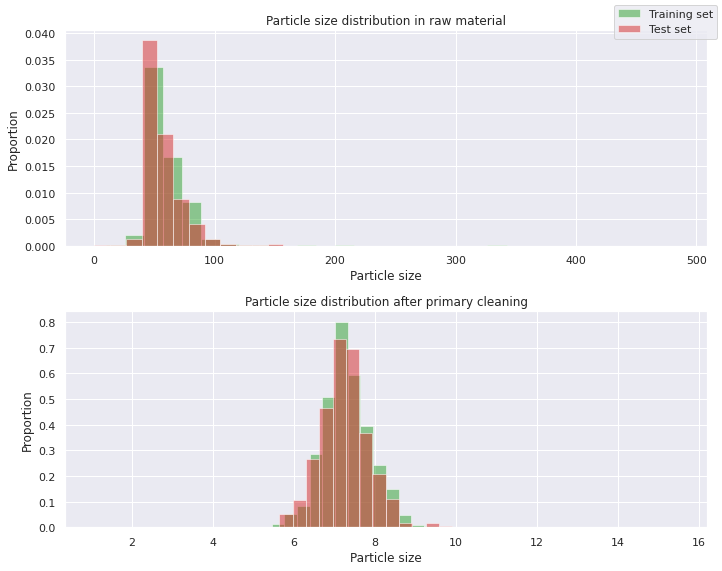

In [13]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Raw material
axs[0].hist(df_train['rougher.input.feed_size'], bins=30, density=True, alpha=.5, color = 'tab:green', ec='w')
axs[0].hist(df_test['rougher.input.feed_size'], bins=30, density=True, alpha=.5, color = 'tab:red', ec='w')
axs[0].set(title='Particle size distribution in raw material', xlabel='Particle size', ylabel='Proportion')

# Primary cleaning
axs[1].hist(df_train['primary_cleaner.input.feed_size'], bins=30, density=True, alpha=.5, color = 'tab:green', ec='w')
axs[1].hist(df_test['primary_cleaner.input.feed_size'], bins=30, density=True, alpha=.5, color = 'tab:red', ec='w')
axs[1].set(title='Particle size distribution after primary cleaning', xlabel='Particle size', ylabel='Proportion')

# Add legend and show the plot
fig.legend(['Training set', 'Test set'])
plt.tight_layout()
fig.show()


### Study of total concentration <a class="anchor" id="study-of-total-concentration"></a>

It is necessary to study the total concentration of all substances at different stages: in the feed, in the rougher and final concentrates.

In [14]:
# Dataframe `rougher.input` for every metal:
rougher_input_full = df_full[
    ['rougher.input.feed_ag', 'rougher.input.feed_au',
     'rougher.input.feed_pb', 'rougher.input.feed_sol']
].sum(axis=1)

# Dataframe `rougher.output`:
rougher_output_full = df_full[
    ['rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
     'rougher.output.concentrate_pb', 'rougher.output.tail_sol']
].sum(axis=1)

# Dataframe `final.output`:
final_output_full = df_full[
    ['final.output.concentrate_ag', 'final.output.concentrate_au',
     'final.output.concentrate_pb', 'final.output.concentrate_sol']
].sum(axis=1)

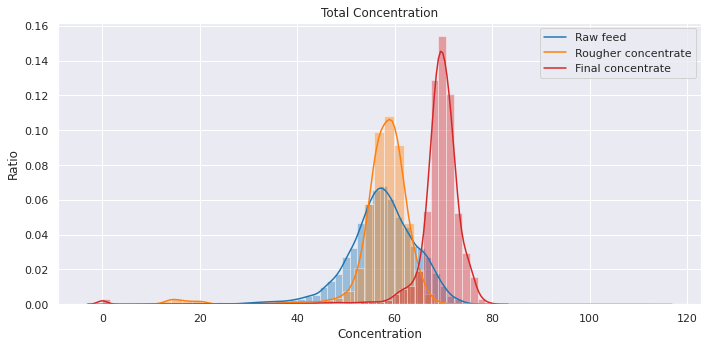

In [15]:
# Settings for the plot
sns.set(
    rc={'figure.figsize': (10, 5)},
    color_codes=True
)
pal = sns.color_palette('Set2')


# Plot
sns.distplot(rougher_input_full, kde=True, color='tab:blue')
sns.distplot(rougher_output_full, kde=True, color='tab:orange')
sns.distplot(final_output_full, kde=True, color='tab:red')
plt.legend(['Raw feed', 'Rougher concentrate', 'Final concentrate'])
plt.title('Total Concentration')
plt.xlabel('Concentration')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()

On the histogram above, minor outliers are visible in the range of 0 and 20. Everything below 20 will be removed.

In [16]:
df_train_clean = df_train.query(
    '@rougher_input_full > 20 & @rougher_output_full > 20 & @final_output_full > 20'
)
df_test_clean = df_test.query(
    '@rougher_input_full > 20 & @rougher_output_full > 20 & @final_output_full > 20'
)
df_full_clean = df_full.query(
    '@rougher_input_full > 20 & @rougher_output_full > 20 & @final_output_full > 20'
)

### Conclusion <a class="anchor" id="data-analysis-conclusion"></a>

Regarding the three metals, the following can be concluded:

- Gold: the concentration increases with each stage;
- Silver: the concentration decreases after flotation;
- Lead: the concentration increases up to primary cleaning and slightly decreases at the final stage;
- Anomalies are visible for each of the three metals.


It is noticeable from the above histograms that there are no significant differences between the two samples (training and testing). According to the condition, in this case, the model evaluation will be correct.

## Model <a class="anchor" id="model"></a>

### sMAPE calculation <a class="anchor" id="smape-calculation"></a>

At this stage, it is necessary to write a function in accordance with the formula from the brief. A function for **sMAPE** (*Symmetric Mean Absolute Percentage Error*):

$$ \text{sMAPE} = \frac{1}{N}\sum_{i=1}^{N}{\frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|) / 2}} $$

In [17]:
def smape(actual, forecast):
    smape = 1/len(actual) * np.sum(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)) * 100)
    return smape

Final sMAPE function:

$$ \text{Finall sMAPE}=25\% * \text{sMAPE(rougher)} + 75\% * \text{sMAPE(final)} $$

In [18]:
def total_smape(rougher, final):
    return (0.25 * rougher + 0.75 * final)

smape_score = make_scorer(smape, greater_is_better=False)

### Datasets preparation <a class="anchor" id="datasets-preparation"></a>

It is needed to train different models and evaluate their quality with cross-validation. Choose the best model and test it on the test sample.

In [19]:
# Data scaling function
def scaler_function(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [20]:
# Rougher stage data
rougher_cols = [col for col in df_test_clean.columns if 'rougher' in col]
X_test_rougher = df_test_clean[rougher_cols]
X_train_rougher = df_train_clean[rougher_cols]
y_train_rougher = df_train_clean['rougher.output.recovery']
y_test_rougher = df_full_clean.loc[X_test_rougher.index, 'rougher.output.recovery']

# Final stage data
X_final = list(df_test_clean.columns)
X_train_final = df_train_clean[X_final]
X_test_final = df_test_clean[X_final]
y_train_final = df_train_clean['final.output.recovery']
y_test_final = df_full_clean.loc[X_test_final.index, 'final.output.recovery']

# Printing shapes of dataframes of each stage
print("Original data shapes:")
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)
print("df_full:", df_full.shape)
print("-")
print("Cleaned data shapes:")
print("df_train_clean:", df_train_clean.shape)
print("df_test_clean:", df_test_clean.shape)
print("df_full_clean:", df_full_clean.shape)
print("-")
print("Rougher stage shapes:")
print("X_train_rougher:", X_train_rougher.shape)
print("X_test_rougher:", X_test_rougher.shape)
print("y_train_rougher:", y_train_rougher.shape)
print("y_test_rougher:", y_test_rougher.shape)
print("-")
print("Final stage shapes:")
print("X_train_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)
print("y_train_final:", y_train_final.shape)
print("y_test_final:", y_test_final.shape)

Original data shapes:
df_train: (14149, 86)
df_test: (5290, 52)
df_full: (19439, 86)
-
Cleaned data shapes:
df_train_clean: (13785, 86)
df_test_clean: (5165, 52)
df_full_clean: (18950, 86)
-
Rougher stage shapes:
X_train_rougher: (13785, 22)
X_test_rougher: (5165, 22)
y_train_rougher: (13785,)
y_test_rougher: (5165,)
-
Final stage shapes:
X_train_final: (13785, 52)
X_test_final: (5165, 52)
y_train_final: (13785,)
y_test_final: (5165,)


In [21]:
# Scaling
X_train_rougher_scaled, X_test_rougher_scaled = scaler_function(X_train_rougher, X_test_rougher)
X_train_final_scaled, X_test_final_scaled = scaler_function(X_train_final, X_test_final)

### Hyperparameter tuning <a class="anchor" id="hyperparameter-tuning"></a>

Hyperparameter tuning for the first stage.


In [22]:
# Passing hyperparameters to RandomizedSearchCV:
params_rfr = {
    'n_estimators': range(400, 1900, 100),
    'min_samples_leaf': range(50, 250, 10),
    'max_depth' : range(10, 120, 10)
}
params_dtr = {
    'min_samples_split': range(2, 20, 1),
    'min_samples_leaf': range(10, 400, 5),
    'max_depth' : range(1, 100, 2)
}

# Iterations and cross-validation values
n_iter = 15
cv = 5

In [23]:
%%time

# RandomForestRegressor
clf = RandomForestRegressor(random_state=8080)
grid_rfr_rougher = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params_rfr,
    n_iter=n_iter,
    n_jobs=-1,
    cv=cv,
    verbose=10)
grid_rfr_rougher.fit(X_train_rougher_scaled, y_train_rougher)
random_forest_params_rougher = grid_rfr_rougher.best_params_
print(f"\nBest parameters for {clf}: \n {random_forest_params_rougher} \n")

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best parameters for RandomForestRegressor(random_state=8080): 
 {'n_estimators': 1500, 'min_samples_leaf': 100, 'max_depth': 100} 

CPU times: user 4min 41s, sys: 2.87 s, total: 4min 44s
Wall time: 1h 31min 45s


In [24]:
%%time

# DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=8080)
grid_dtr_rougher = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params_dtr,
    n_iter=n_iter,
    n_jobs=-1,
    cv=cv,
    verbose=10)
grid_dtr_rougher.fit(X_train_rougher_scaled, y_train_rougher)
decision_tree_params_rougher = grid_dtr_rougher.best_params_
print(f"\nBest parameters for {clf}: \n {decision_tree_params_rougher} \n")

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best parameters for DecisionTreeRegressor(random_state=8080): 
 {'min_samples_split': 11, 'min_samples_leaf': 140, 'max_depth': 83} 

CPU times: user 552 ms, sys: 4.93 ms, total: 557 ms
Wall time: 11 s


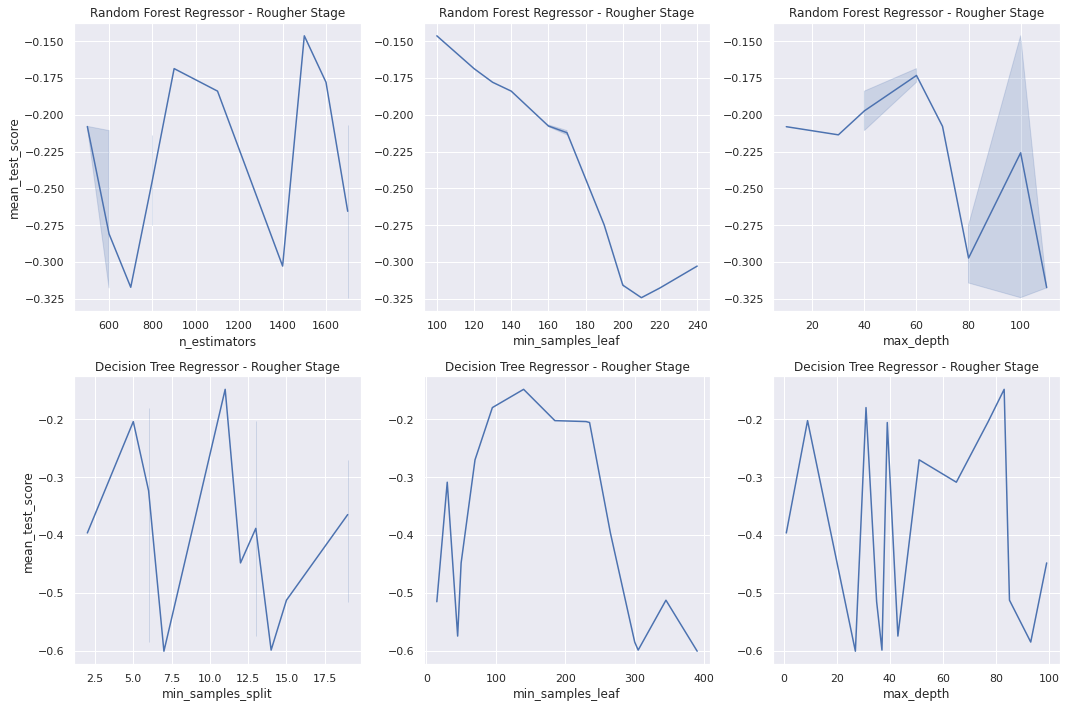

In [25]:
# Define the subplots
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Random Forest Regressor - Rougher Stage
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=pd.DataFrame(grid_rfr_rougher.cv_results_), ax=axs[0,0])
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=pd.DataFrame(grid_rfr_rougher.cv_results_), ax=axs[0,1])
sns.lineplot(x='param_max_depth', y='mean_test_score', data=pd.DataFrame(grid_rfr_rougher.cv_results_), ax=axs[0,2])

# Decision Tree Regressor - Rougher Stage
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=pd.DataFrame(grid_dtr_rougher.cv_results_), ax=axs[1,0])
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=pd.DataFrame(grid_dtr_rougher.cv_results_), ax=axs[1,1])
sns.lineplot(x='param_max_depth', y='mean_test_score', data=pd.DataFrame(grid_dtr_rougher.cv_results_), ax=axs[1,2])

# Add titles and labels to the subplots
axs[0,0].set(title='Random Forest Regressor - Rougher Stage', xlabel='n_estimators', ylabel='mean_test_score')
axs[0,1].set(title='Random Forest Regressor - Rougher Stage', xlabel='min_samples_leaf', ylabel='')
axs[0,2].set(title='Random Forest Regressor - Rougher Stage', xlabel='max_depth', ylabel='')

axs[1,0].set(title='Decision Tree Regressor - Rougher Stage', xlabel='min_samples_split', ylabel='mean_test_score')
axs[1,1].set(title='Decision Tree Regressor - Rougher Stage', xlabel='min_samples_leaf', ylabel='')
axs[1,2].set(title='Decision Tree Regressor - Rougher Stage', xlabel='max_depth', ylabel='')

# Adjust the layout and spacing of the subplots
plt.tight_layout()

Hyperparameter tuning for the final stage.

In [26]:
%%time

# RandomForestRegressor
clf = RandomForestRegressor(random_state=8080)
grid_rfr_final = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params_rfr,
    n_iter=n_iter,
    n_jobs=-1,
    cv=cv,
    verbose=10)
grid_rfr_final.fit(X_train_final_scaled, y_train_final)
random_forest_params_final = grid_rfr_final.best_params_
print(f"\nBest parameters for {clf}: \n {random_forest_params_final} \n")

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best parameters for RandomForestRegressor(random_state=8080): 
 {'n_estimators': 1700, 'min_samples_leaf': 130, 'max_depth': 20} 

CPU times: user 11min 7s, sys: 7.12 s, total: 11min 14s
Wall time: 4h 4min 39s


In [27]:
%%time

# DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=8080)
grid_dtr_final = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params_dtr,
    n_iter=n_iter,
    n_jobs=-1,
    cv=cv,
    verbose=10)
grid_dtr_final.fit(X_train_final_scaled, y_train_final)
decision_tree_params_final = grid_dtr_final.best_params_
print(f"\nBest parameters for {clf}: \n {decision_tree_params_final} \n")

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best parameters for DecisionTreeRegressor(random_state=8080): 
 {'min_samples_split': 14, 'min_samples_leaf': 260, 'max_depth': 75} 

CPU times: user 819 ms, sys: 54.8 ms, total: 874 ms
Wall time: 22.8 s


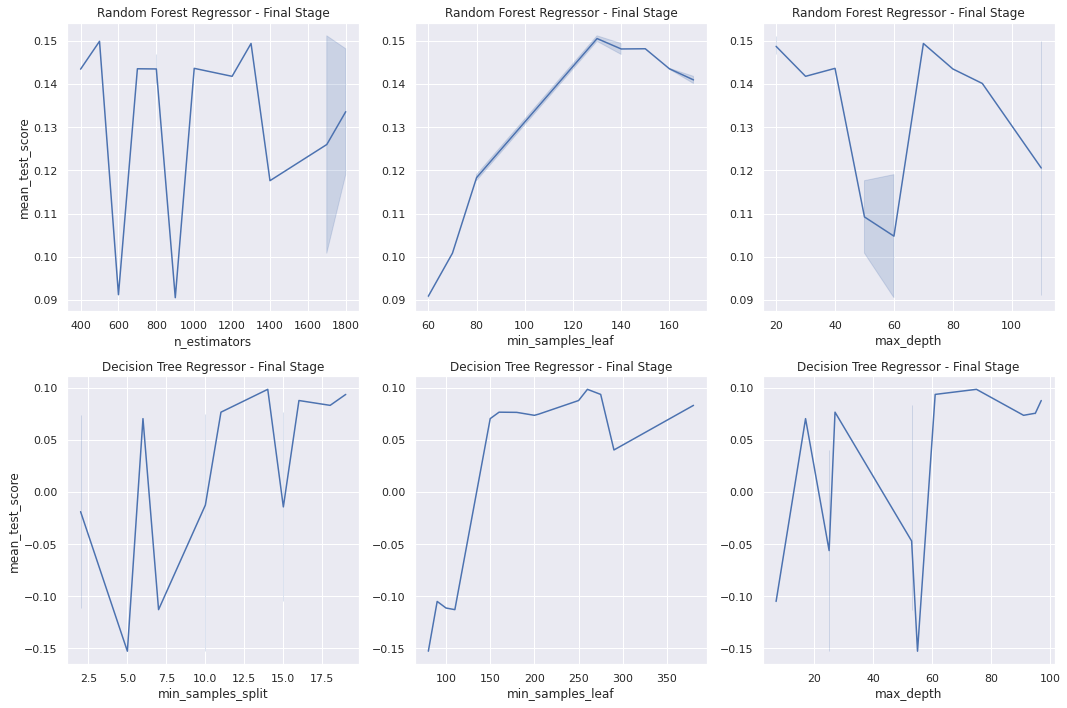

In [28]:
# Define the subplots
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Random Forest Regressor - Final Stage
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=pd.DataFrame(grid_rfr_final.cv_results_), ax=axs[0,0])
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=pd.DataFrame(grid_rfr_final.cv_results_), ax=axs[0,1])
sns.lineplot(x='param_max_depth', y='mean_test_score', data=pd.DataFrame(grid_rfr_final.cv_results_), ax=axs[0,2])

# Decision Tree Regressor - Final Stage
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=pd.DataFrame(grid_dtr_final.cv_results_), ax=axs[1,0])
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=pd.DataFrame(grid_dtr_final.cv_results_), ax=axs[1,1])
sns.lineplot(x='param_max_depth', y='mean_test_score', data=pd.DataFrame(grid_dtr_final.cv_results_), ax=axs[1,2])

# Add titles and labels to the subplots
axs[0,0].set(title='Random Forest Regressor - Final Stage', xlabel='n_estimators', ylabel='mean_test_score')
axs[0,1].set(title='Random Forest Regressor - Final Stage', xlabel='min_samples_leaf', ylabel='')
axs[0,2].set(title='Random Forest Regressor - Final Stage', xlabel='max_depth', ylabel='')

axs[1,0].set(title='Decision Tree Regressor - Final Stage', xlabel='min_samples_split', ylabel='mean_test_score')
axs[1,1].set(title='Decision Tree Regressor - Final Stage', xlabel='min_samples_leaf', ylabel='')
axs[1,2].set(title='Decision Tree Regressor - Final Stage', xlabel='max_depth', ylabel='')

# Adjust the layout and spacing of the subplots
plt.tight_layout()

In [29]:
print(f"Best founded hyperparameters:")
params_vals = {'RFR_rough'  : random_forest_params_rougher,
               'DTR_rough'  : decision_tree_params_rougher,
               'RFR_final'  : random_forest_params_final,
               'DTR_final'  : decision_tree_params_final}
params_df = pd.DataFrame(params_vals)
params_df.fillna('', inplace=True)
params_df

Best founded hyperparameters:


,RFR_rough,DTR_rough,RFR_final,DTR_final
n_estimators,1500.0,,1700.0,
min_samples_leaf,100.0,140.0,130.0,260.0
max_depth,100.0,83.0,20.0,75.0
min_samples_split,,11.0,,14.0


### Models training <a class="anchor" id="models-training"></a>

First stage.

In [30]:
%%time

# RandomForestRegressor
random_forest_rougher = RandomForestRegressor(
    n_estimators=random_forest_params_rougher.get('n_estimators'),
    min_samples_leaf=random_forest_params_rougher.get('min_samples_leaf'),
    max_depth=random_forest_params_rougher.get('max_depth'),
    random_state=8080)
random_forest_rougher.fit(X_train_rougher_scaled, y_train_rougher)
predictions_rfr_rougher = random_forest_rougher.predict(X_train_rougher_scaled)
smape_rfr_rougher = smape(y_train_rougher, predictions_rfr_rougher)
print(f"sMAPE for {random_forest_rougher}: {smape_rfr_rougher:.4f}\n")

sMAPE for RandomForestRegressor(max_depth=100, min_samples_leaf=100, n_estimators=1500,
                      random_state=8080): 8.8733

CPU times: user 4min 12s, sys: 212 ms, total: 4min 12s
Wall time: 4min 12s


In [31]:
%%time

# DecisionTreeRegressor
decision_tree_rougher = DecisionTreeRegressor(
    min_samples_split=decision_tree_params_rougher.get('min_samples_split'),
    min_samples_leaf=decision_tree_params_rougher.get('min_samples_leaf'),
    max_depth=decision_tree_params_rougher.get('max_depth'),
    random_state=8080)
decision_tree_rougher.fit(X_train_rougher_scaled, y_train_rougher)
predictions_dtr_rougher = decision_tree_rougher.predict(X_train_rougher_scaled)
smape_dtr_rougher = smape(y_train_rougher, predictions_dtr_rougher)
print(f"sMAPE for {decision_tree_rougher}: {smape_dtr_rougher:.4f}\n")

sMAPE for DecisionTreeRegressor(max_depth=83, min_samples_leaf=140, min_samples_split=11,
                      random_state=8080): 9.2207

CPU times: user 321 ms, sys: 0 ns, total: 321 ms
Wall time: 326 ms


In [32]:
%%time

# LinearRegression
linear_reg_rougher = LinearRegression()
smape_lr_rougher = abs(cross_val_score(estimator=linear_reg_rougher,
                            X=X_train_rougher_scaled,
                            y=y_train_rougher,
                            cv=cv,
                            scoring=smape_score)).mean()
print(f"sMAPE for {linear_reg_rougher}: {smape_lr_rougher:.4f}\n")

sMAPE for LinearRegression(): 12.4236

CPU times: user 96.7 ms, sys: 92.5 ms, total: 189 ms
Wall time: 230 ms


Training for final stage.

In [33]:
%%time

# RandomForestRegressor
random_forest_final = RandomForestRegressor(
    n_estimators=random_forest_params_final.get('n_estimators'),
    min_samples_leaf=random_forest_params_final.get('min_samples_leaf'),
    max_depth=random_forest_params_final.get('max_depth'),
    random_state=8080)
random_forest_final.fit(X_train_final_scaled, y_train_final)
predictions_rfr_final = random_forest_final.predict(X_train_final_scaled)
smape_rfr_final = smape(y_train_final, predictions_rfr_final)
print(f"sMAPE for {random_forest_final}: {smape_rfr_final:.4f}\n")

sMAPE for RandomForestRegressor(max_depth=20, min_samples_leaf=130, n_estimators=1700,
                      random_state=8080): 7.6401

CPU times: user 9min 49s, sys: 565 ms, total: 9min 49s
Wall time: 9min 50s


In [34]:
%%time

# DecisionTreeRegressor
decision_tree_final = DecisionTreeRegressor(
    min_samples_split=decision_tree_params_final.get('min_samples_split'),
    min_samples_leaf=decision_tree_params_final.get('min_samples_leaf'),
    max_depth=decision_tree_params_final.get('max_depth'),
    random_state=8080)
decision_tree_final.fit(X_train_final_scaled, y_train_final)
predictions_dtr_final = decision_tree_final.predict(X_train_final_scaled)
smape_dtr_final = smape(y_train_final, predictions_dtr_final)
print(f"sMAPE for {decision_tree_final}: {smape_dtr_final:.4f}\n")

sMAPE for DecisionTreeRegressor(max_depth=75, min_samples_leaf=260, min_samples_split=14,
                      random_state=8080): 8.2104

CPU times: user 564 ms, sys: 0 ns, total: 564 ms
Wall time: 582 ms


In [35]:
%%time

# LinearRegression
linear_reg_final = LinearRegression()
smape_lr_final = abs(cross_val_score(estimator=linear_reg_final,
                            X=X_train_final_scaled,
                            y=y_train_final,
                            cv=cv,
                            scoring=smape_score)).mean()
print(f"sMAPE for {linear_reg_final}: {smape_lr_final:.4f}\n")

sMAPE for LinearRegression(): 11.9075

CPU times: user 167 ms, sys: 163 ms, total: 330 ms
Wall time: 188 ms


### sMAPE results <a class="anchor" id="smape-results"></a>

In [36]:
print(f"Final sMAPE results:")
names = ['RFR', 'DTR', 'LR']
smape_results = [total_smape(smape_rfr_rougher, smape_rfr_final),
                 total_smape(smape_dtr_rougher, smape_dtr_final),
                 total_smape(smape_lr_rougher, smape_lr_final)]
smape_results_data = {'Final sMAPE': smape_results}

smape_results_df = pd.DataFrame(smape_results_data, index=names).sort_values(by='Final sMAPE')
smape_results_df

Final sMAPE results:


,Final sMAPE
RFR,7.948426
DTR,8.463009
LR,12.036531


### Conclusion <a class="anchor" id="model-conclusion"></a>

1. Three models were selected for training: `RandomForestRegressor`, `DecisionTreeRegressor` and `LinearRegression`. For the first two, the best parameters were selected using `RandomizedSearchCV`.
Parameters grid:


In [37]:
print(f"Hyperparameters for RandomForestRegressor: \n{params_rfr}")
print(f"Hyperparameters for DecisionTreeRegressor: \n{params_dtr}")

Hyperparameters for RandomForestRegressor: 
{'n_estimators': range(400, 1900, 100), 'min_samples_leaf': range(50, 250, 10), 'max_depth': range(10, 120, 10)}
Hyperparameters for DecisionTreeRegressor: 
{'min_samples_split': range(2, 20), 'min_samples_leaf': range(10, 400, 5), 'max_depth': range(1, 100, 2)}


2. Hyperparameters tuning were performed with the following values:
    - number of iterations `n_iter=15`;
    - cross-validation `cv=5`.
3. The final metric was the custom function `total_smape`, which works according to the formula $ \text{Finall sMAPE}=25\% * \text{sMAPE(rougher)} + 75\% * \text{sMAPE(final)} $
4. The most effective model was found to be:

In [38]:
random_forest_final

RandomForestRegressor(max_depth=20, min_samples_leaf=130, n_estimators=1700,
                      random_state=8080)

## Best model test <a class="anchor" id="best-model-test"></a>

It is necessary to test the most effective model (with best founded hyperparameters for each stage) on the test dataset.

In [39]:
%%time

# Rougher stage Best Model
test_model_rougher = RandomForestRegressor(
    n_estimators=random_forest_params_rougher.get('n_estimators'),
    min_samples_leaf=random_forest_params_rougher.get('min_samples_leaf'),
    max_depth=random_forest_params_rougher.get('max_depth'),
    random_state=8080)
test_model_rougher.fit(X_train_rougher_scaled, y_train_rougher)
predictions_test_rougher = pd.Series(
    test_model_rougher.predict(X_test_rougher_scaled)
)

# Rougher result Best Model
smape_rougher_test = smape(y_test_rougher, predictions_test_rougher)

# Final stage Best Model
test_model_final = RandomForestRegressor(
    n_estimators=random_forest_params_final.get('n_estimators'),
    min_samples_leaf=random_forest_params_final.get('min_samples_leaf'),
    max_depth=random_forest_params_final.get('max_depth'),
    random_state=8080)
test_model_final.fit(X_train_final_scaled, y_train_final)
prediction_test_final = pd.Series(
    test_model_final.predict(X_test_final_scaled)
)

# Final result Best Model
smape_final_test = smape(y_test_final, prediction_test_final)

CPU times: user 13min 58s, sys: 721 ms, total: 13min 59s
Wall time: 13min 58s


In [40]:
print(f"Final sMAPE: {total_smape(smape_rougher_test, smape_final_test):.4f}")

Final sMAPE: 11.0763


## Conclusion <a class="anchor" id="conclusion"></a>

1. Initial **data review**, showed the following:

    - `df_train`: there were 4100 missing values and 0 duplicates.
    - `df_test`: there were 90 missing values and 0 duplicates.
    - `df_full`: there were 4481 missing values and 0 duplicates.

2. **Enrichment efficiency.** The calculation of gold recovery efficiency was checked and the results are correct. The value of Mean Absolute Error (MAE) was calculated and it is extremely low: **0.00000000000000973512347450521**, which indicates a high level of accuracy.

3. **Features analysis.** In the `df_test` test set, 34 features are missing.
4. **Data preprocessing:**

    - Dates were removed since they were not necessary for further analysis and data processing.
    - Missing values in the `df_train` and `df_test` dataframes were filled using the forward-fill method `ffill()`. This method fills the missing values with the previous non-missing value, and since neighboring time parameters are often similar, this approach was considered reasonable.

5. **Data analysis**. During the analysis of metal concentration, it was found that:
    - Gold: the concentration increases with each stage;
    - Silver: the concentration decreases after flotation;
    - Lead: the concentration increases up to primary cleaning and slightly decreases at the final stage;
    - Anomalies are visible for each of the three metals.

6. During the investigation of the **distribution of raw material particle sizes**, it was found out that there are no significant differences between the two datasets (training and test).
7. **Model training:**
    - Three models were selected for training: `RandomForestRegressor`, `DecisionTreeRegressor` and `LinearRegression`. For the first two, the best parameters were found using `RandomizedSearchCV`.
    - Hyperparameters tuning were performed with the following values:
        - number of iterations `n_iter=15`;
        - cross-validation `cv=5`.
    - The final metric was the custom function `total_smape`.
    - The most effective model:
    `RandomForestRegressor(max_depth=20, min_samples_leaf=130, n_estimators=1700)`
    - The final sMAPE is 11.07%.